# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
current_btc_price = requests.get(btc_url).json()['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
current_eth_price = requests.get(eth_url).json()['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $55413.60
The current value of your 5.3 ETH is $18334.08


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [8]:
# Format current date as ISO format
current_date = pd.Timestamp('2021-09-11', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker_data = api.get_barset(
    tickers,
    timeframe,
    end=current_date,
    limit=1000
).df

# Preview DataFrame
ticker_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-09-20 00:00:00-04:00  109.84  109.9194  109.59  109.700  1216139.0   
2017-09-21 00:00:00-04:00  109.82  109.8500  109.68  109.680  2102279.0   
2017-09-22 00:00:00-04:00  109.86  109.9000  109.75  109.785  1325024.0   
2017-09-25 00:00:00-04:00  109.85  110.0400  109.82  110.025  3031529.0   
2017-09-26 00:00:00-04:00  109.95  110.0200  109.88  109.990  2074080.0   

                              SPY                                         
                             open      high      low   close      volume  
time                                                                      
2017-09-20 00:00:00-04:00     NaN       NaN      NaN     NaN         NaN  
2017-09-21 00:00:00-04:00  249.89  249.9800  249.185  249.40  29220256.0  
2017-09-22 00:00:00-04:00  249.05  249.6300  249.020  249.42  31078666.0  
2017-09-25 00:00:00-04:00  249.14  249.5532  248.080  248.94  42826453.0  
2017-09-26 00:00:00-04:00  249.42  249.7000  248.805  249.05  36761208.0

In [9]:
# Pick AGG and SPY close prices
agg_close_price = ticker_data['AGG']['close'][-1]
spy_close_price = ticker_data['SPY']['close'][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.87
Current SPY closing price: $445.5


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22275.00
The current value of your 200 AGG shares is $23174.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
asset_data = {
    'amount': [my_btc_value + my_eth_value, my_agg_value + my_spy_value]
}

# Create savings DataFrame
df_savings = pd.DataFrame(asset_data, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,73747.678
shares,45449.000


<AxesSubplot:ylabel='amount'>

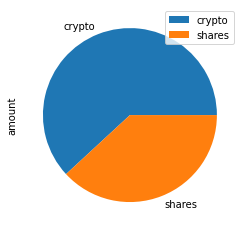

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings_amount = df_savings['amount'].sum()

# Validate saving health
if total_savings_amount > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
    
elif total_savings_amount == emergency_fund:
    print("Congratulations! You have just reached this financial goal.")
    
else:
    print(f"Your are ${emergency_fund - total_savings_amount} away from reaching this financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data = MCSimulation(
    df_stock_data,
    weights=[0.40, 0.60],
    num_simulation=500,
    num_trading_days=252*30
)

In [17]:
# Printing the simulation input data
MC_stock_data.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985742,0.997345,1.000092,0.991597,0.994606,0.988560,1.010425,0.998055,1.010510,0.999866,...,1.011032,1.005288,0.992304,1.005167,0.998522,1.008987,1.002006,1.001880,1.014030,0.997005
2,0.970485,0.992709,1.001293,1.001268,1.000078,0.979524,1.001311,1.007912,1.003380,0.994643,...,1.016488,1.005098,0.991926,1.007221,1.001410,1.015332,0.994136,1.007687,1.021776,1.001594
3,0.956943,0.996470,0.992402,1.002001,0.998914,0.985128,1.010597,1.015844,1.006933,0.998338,...,1.002357,1.010570,0.977631,1.013853,1.014752,1.009218,1.000924,1.014979,1.019843,0.998326
4,0.950693,0.990550,0.999819,1.001229,0.991111,0.988187,1.014344,1.013386,0.991747,1.002104,...,0.988686,1.015736,0.975012,1.027002,1.014502,1.006176,1.004514,1.014093,1.016327,0.994287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.672685,14.336004,19.084820,10.785752,18.331978,15.476397,17.368546,43.365979,18.733607,18.556727,...,22.636346,23.716669,11.315086,23.336582,19.841134,3.440669,21.329231,12.917909,13.142150,26.180203
7557,14.691937,14.082674,19.148511,10.865887,18.420921,15.368882,17.472182,43.165506,18.554139,18.628573,...,22.829540,23.784720,11.214442,23.007922,19.888075,3.435535,20.775036,13.099501,13.383396,26.370914
7558,14.738834,14.015145,19.381449,10.775850,18.539908,15.432844,17.499740,43.306625,18.449846,18.550385,...,23.105528,23.815671,11.348205,23.174691,19.919474,3.436474,20.680360,13.091070,13.195148,26.567531
7559,14.775691,13.885944,19.351891,10.813461,18.438947,15.470417,17.586083,43.244929,18.582053,18.586141,...,22.662756,23.890904,11.394233,23.179741,19.820699,3.410362,20.748650,12.926252,13.099604,26.368309


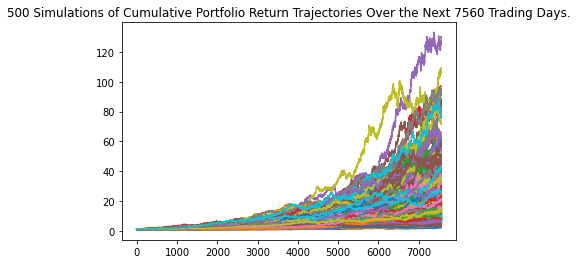

In [19]:
# Plot simulation outcomes
line_plot = MC_stock_data.plot_simulation()

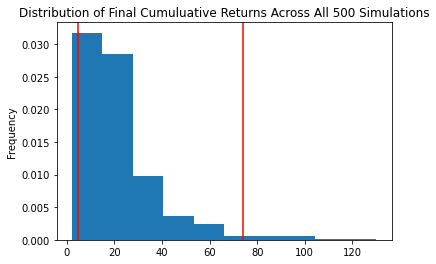

In [20]:
# Plot probability distribution and confidence intervals
plot_distribution = MC_stock_data.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_stock_data.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean             21.994699
std              16.910369
min               2.150613
25%              10.931260
50%              17.973255
75%              26.575955
max             130.039771
95% CI Lower      4.570770
95% CI Upper     74.009824
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8] * initial_investment, 2)
ci_upper = round(summary_stats[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $91415.39 and $1480196.47


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8] * initial_investment, 2)
ci_upper = round(summary_stats[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $137123.09 and $2220294.71


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_years_returns = MCSimulation(
    df_stock_data,
    weights=[0.40, 0.60],
    num_simulation=500,
    num_trading_days=252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_years_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012270,1.003184,1.005094,1.004769,0.989903,0.994856,1.020129,0.998465,1.015252,0.991489,...,1.000232,1.017016,0.986532,1.004628,0.988784,1.002820,0.991642,0.991748,0.995686,0.990264
2,1.002813,1.004162,1.003038,1.000057,0.991629,0.992764,1.031815,0.990220,1.006874,0.986793,...,0.983781,1.005501,0.983263,0.988340,0.978944,1.007789,0.996235,0.995130,0.991910,0.996950
3,0.990232,1.006194,1.000506,1.002847,0.987533,0.999080,1.033336,0.988607,0.999476,0.999412,...,0.990030,1.002902,1.001520,0.980415,0.987616,1.003083,0.996403,1.001466,0.987112,0.989530
4,0.997384,0.994786,0.992755,1.015304,0.987919,1.006455,1.035486,0.984166,0.993058,1.010350,...,0.985802,1.012262,1.003058,0.983150,0.994133,1.001465,0.997300,0.993692,0.987358,0.993048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.298100,1.654998,1.705077,1.660860,1.640512,1.948038,1.194448,1.863864,2.078254,1.247446,...,1.413423,2.230272,1.257583,2.424772,1.802556,3.110665,1.584183,1.184501,1.623695,1.665871
1257,2.306399,1.683354,1.712487,1.660000,1.647463,1.959843,1.209178,1.860494,2.079932,1.240418,...,1.420449,2.234550,1.247779,2.425020,1.805925,3.155102,1.608305,1.176115,1.626684,1.676021
1258,2.293772,1.680507,1.735080,1.669056,1.656218,1.975560,1.224514,1.855203,2.065174,1.241871,...,1.431215,2.209612,1.252246,2.412391,1.795767,3.132867,1.601058,1.182745,1.608533,1.673936
1259,2.298008,1.695478,1.745363,1.656689,1.665705,1.980705,1.240696,1.866769,2.077146,1.248009,...,1.432326,2.220996,1.254614,2.389095,1.803744,3.125823,1.607523,1.171965,1.609068,1.672139


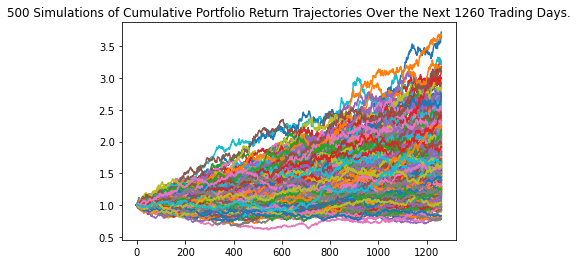

In [26]:
# Plot simulation outcomes
line_plot = MC_5_years_returns.plot_simulation()

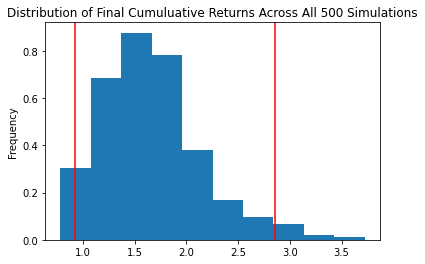

In [27]:
# Plot probability distribution and confidence intervals
plot_distribution = MC_5_years_returns.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_5_years = MC_5_years_returns.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_5_years)

count           500.000000
mean              1.658429
std               0.487193
min               0.781474
25%               1.295902
50%               1.585266
75%               1.913864
max               3.722513
95% CI Lower      0.921914
95% CI Upper      2.856297
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_stats_5_years[8] * initial_investment, 2)
ci_upper_five = round(summary_stats_5_years[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55314.83 and $171377.84


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years_returns = MCSimulation(
    df_stock_data,
    weights=[0.40, 0.60],
    num_simulation=500,
    num_trading_days=252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990151,1.006953,0.986813,1.000805,0.992848,0.994622,0.991556,0.992311,1.003561,1.010260,...,1.001265,1.004212,0.988140,1.018090,1.012660,0.985703,1.001593,0.996075,1.002289,0.998448
2,0.990622,1.005530,0.999918,0.996847,0.996446,0.990986,0.975598,0.986467,0.996917,1.003152,...,1.004985,0.998689,0.980362,1.005108,1.006062,0.988617,1.004021,0.993108,1.004217,0.999207
3,0.999811,1.007368,0.984082,1.008630,0.989549,0.980478,0.979750,0.988277,0.996435,1.000313,...,1.001762,1.003901,0.994307,1.021183,1.003149,0.981956,1.014679,0.991071,1.001543,1.009072
4,1.007434,1.016594,0.984743,1.009643,0.999072,0.980222,0.972178,0.992583,1.008236,1.003030,...,1.006956,1.012389,0.989872,1.031615,1.018562,0.976877,1.027200,0.974706,1.015143,1.005753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.803620,1.530310,1.629846,3.643073,2.122972,1.748259,2.698158,3.672693,2.821855,2.253354,...,1.720587,1.415344,2.455474,2.168222,3.334817,2.130273,2.467033,2.787152,1.449158,4.053230
2517,2.776809,1.521248,1.620764,3.631279,2.096202,1.745619,2.687560,3.695459,2.850349,2.268344,...,1.729163,1.404450,2.466445,2.169300,3.368033,2.118629,2.484260,2.780302,1.430299,4.008671
2518,2.777364,1.543838,1.625439,3.592863,2.091943,1.741345,2.681233,3.684409,2.840244,2.293169,...,1.710176,1.379466,2.455684,2.145524,3.335728,2.149138,2.503914,2.780267,1.423434,3.977848
2519,2.749168,1.556199,1.617230,3.617074,2.075483,1.725554,2.679357,3.660750,2.812505,2.320414,...,1.722273,1.381769,2.484117,2.161176,3.288374,2.153246,2.515837,2.761531,1.422688,4.011905


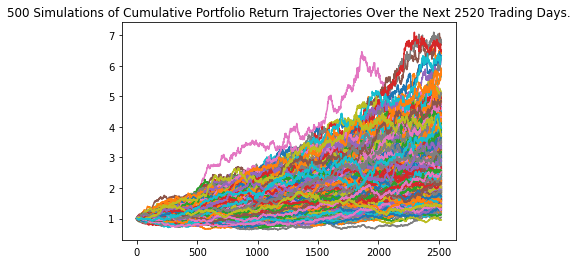

In [32]:
# Plot simulation outcomes
line_plot = MC_10_years_returns.plot_simulation()

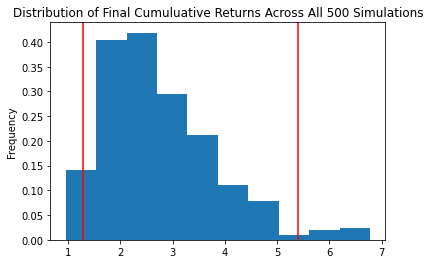

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10_years_returns.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_10_years = MC_10_years_returns.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_10_years)

count           500.000000
mean              2.749850
std               1.074157
min               0.952787
25%               1.942937
50%               2.517342
75%               3.354136
max               6.778160
95% CI Lower      1.293927
95% CI Upper      5.397793
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stats_10_years[8] * initial_investment, 2)
ci_upper_ten = round(summary_stats_10_years[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $77635.65 and $323867.58
